In [1]:
pip install unidecode

In [2]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
from pandas_profiling import ProfileReport
from unidecode import unidecode
import pickle as pkl
from joblib import dump

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score, accuracy_score,
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt


C:\Users\user\AppData\Local\Temp\ipykernel_16944\3387690250.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from Limpieza import Limpieza

In [4]:
#Crear el Pipeline con las transformaciones necesarias
pipeline = Pipeline([
    ('limpieza', Limpieza()),
    ('vectorizer', TfidfVectorizer(tokenizer=word_tokenize, stop_words=stopwords.words("spanish"))),
    ('classifier', SVC())
])

In [6]:
data_t = pd.read_csv('./data/tipo2_entrenamiento_estudiantes.csv')
data_t.sample(5)

,Review,Class
1827,Si quieres ir a conocer la hermosisima Cuba qu...,1
6493,Nos hospedamos en el Luxxe de Nuevo Vallarta l...,4
4664,Fuimos a la boda de mi hijo. 45 personas reser...,3
1709,"El servicio me pareció muy bueno, las habitaci...",5
7037,"Fui al festival del Asado en Valquirico, hice ...",2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_t[["Review"]], data_t["Class"], random_state=1, stratify=data_t['Class'])

In [8]:
X_train.shape, X_test.shape

((5906, 1), (1969, 1))

In [9]:
y_train.shape, y_test.shape

((5906,), (1969,))

In [10]:
pipeline.fit(X_train, y_train)

Limpieza
Transformado texto


c:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('limpieza', Limpieza()),
                ('vectorizer',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x0000020A452D74C0>)),
                ('classifier', SVC())])

In [11]:
y_train_hash_predict = pipeline.predict(X_train)
y_test_hash_predict = pipeline.predict(X_test)

Transformado texto
Transformado texto


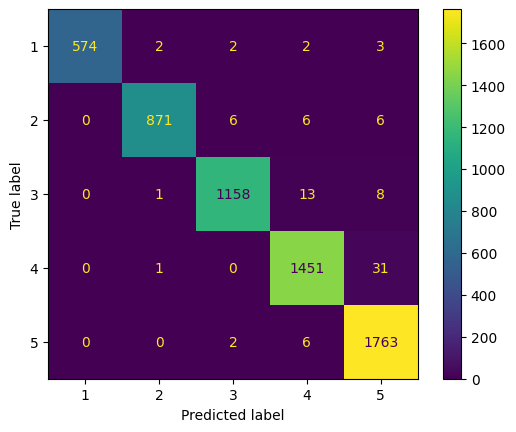

In [12]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_hash_predict)

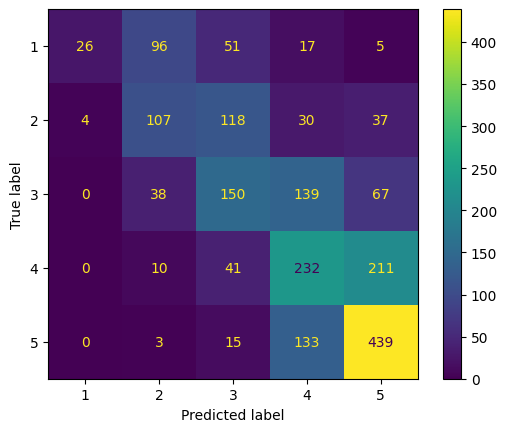

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_hash_predict)

In [14]:
rutaPipeline =  "pipeline.joblib"
dump(pipeline, rutaPipeline)

rutaPipeline =  "pipeline.pkl"
with open(rutaPipeline, 'wb') as file:
    pkl.dump(pipeline, file)